In [237]:
#importación de librerias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
df = pd.read_excel('data/HombresNum.xlsx')

In [239]:
df.head()

,Attrition,Age,Education,JobLevel,JobSatisfaction,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,No,49,1,2,2,1,3,10,7,1,7
1,Yes,37,2,1,3,6,3,0,0,0,0
2,No,27,1,1,2,9,3,2,2,2,2
3,No,32,2,1,4,0,2,7,7,3,6
4,No,30,1,1,3,1,2,1,0,0,0


In [240]:
df.describe()

,Age,Education,JobLevel,JobSatisfaction,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,36.653061,2.899093,2.028345,2.758503,2.613379,2.758503,6.859410,4.106576,2.116780,4.034014
std,9.042329,1.035148,1.113477,1.106970,2.470521,1.269373,6.205575,3.519361,3.188546,3.517587
min,18.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,1.000000,2.000000,1.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,3.000000,2.000000,3.000000,1.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.000000,4.000000,3.000000,4.000000,4.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,5.000000,5.000000,4.000000,9.000000,6.000000,37.000000,18.000000,15.000000,17.000000


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Attrition                882 non-null    object
 1   Age                      882 non-null    int64 
 2   Education                882 non-null    int64 
 3   JobLevel                 882 non-null    int64 
 4   JobSatisfaction          882 non-null    int64 
 5   NumCompaniesWorked       882 non-null    int64 
 6   TrainingTimesLastYear    882 non-null    int64 
 7   YearsAtCompany           882 non-null    int64 
 8   YearsInCurrentRole       882 non-null    int64 
 9   YearsSinceLastPromotion  882 non-null    int64 
 10  YearsWithCurrManager     882 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 75.9+ KB


In [242]:
df.isnull().sum()

Attrition                  0
Age                        0
Education                  0
JobLevel                   0
JobSatisfaction            0
NumCompaniesWorked         0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [243]:
#Preprocesamiento 
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})

In [244]:
df.sample(10)

,Attrition,Age,Education,JobLevel,JobSatisfaction,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
362,0,27,1,3,4,1,3,9,8,0,8
118,0,27,1,2,1,5,1,2,2,2,0
708,1,23,1,1,3,1,2,5,4,1,2
42,0,29,3,1,2,0,3,5,4,0,4
687,1,35,3,3,1,9,3,13,12,6,0
209,0,38,2,3,4,0,3,11,10,2,9
583,0,26,1,1,4,0,2,4,3,1,1
592,0,36,4,2,4,1,2,10,4,1,8
749,1,43,3,1,3,9,4,1,0,0,0
11,0,32,2,1,2,0,5,6,2,0,5


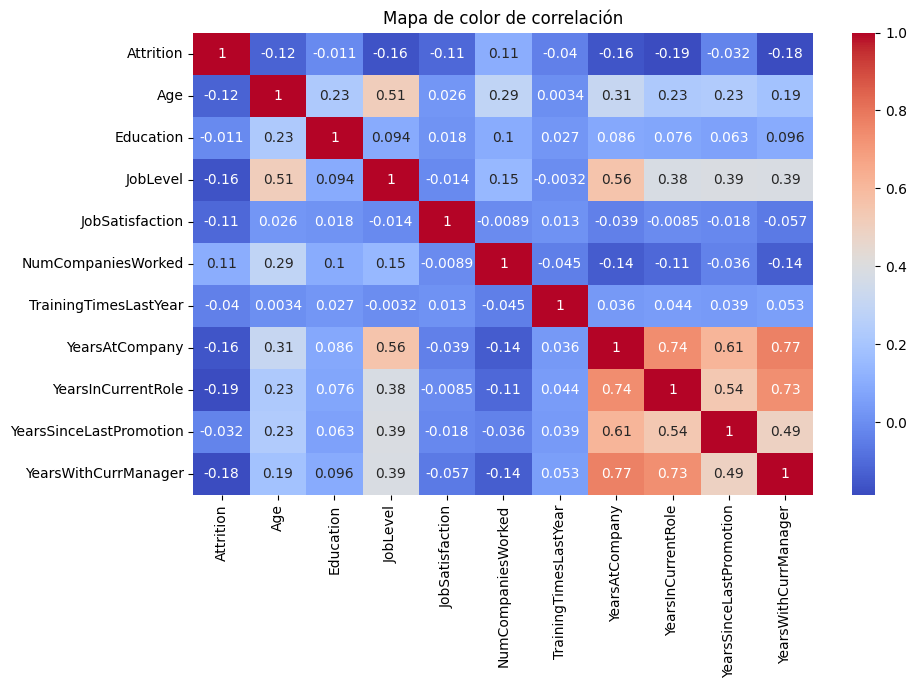

In [245]:
#Gráfica_01 Heatmap de correlación
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Mapa de color de correlación')
plt.show()

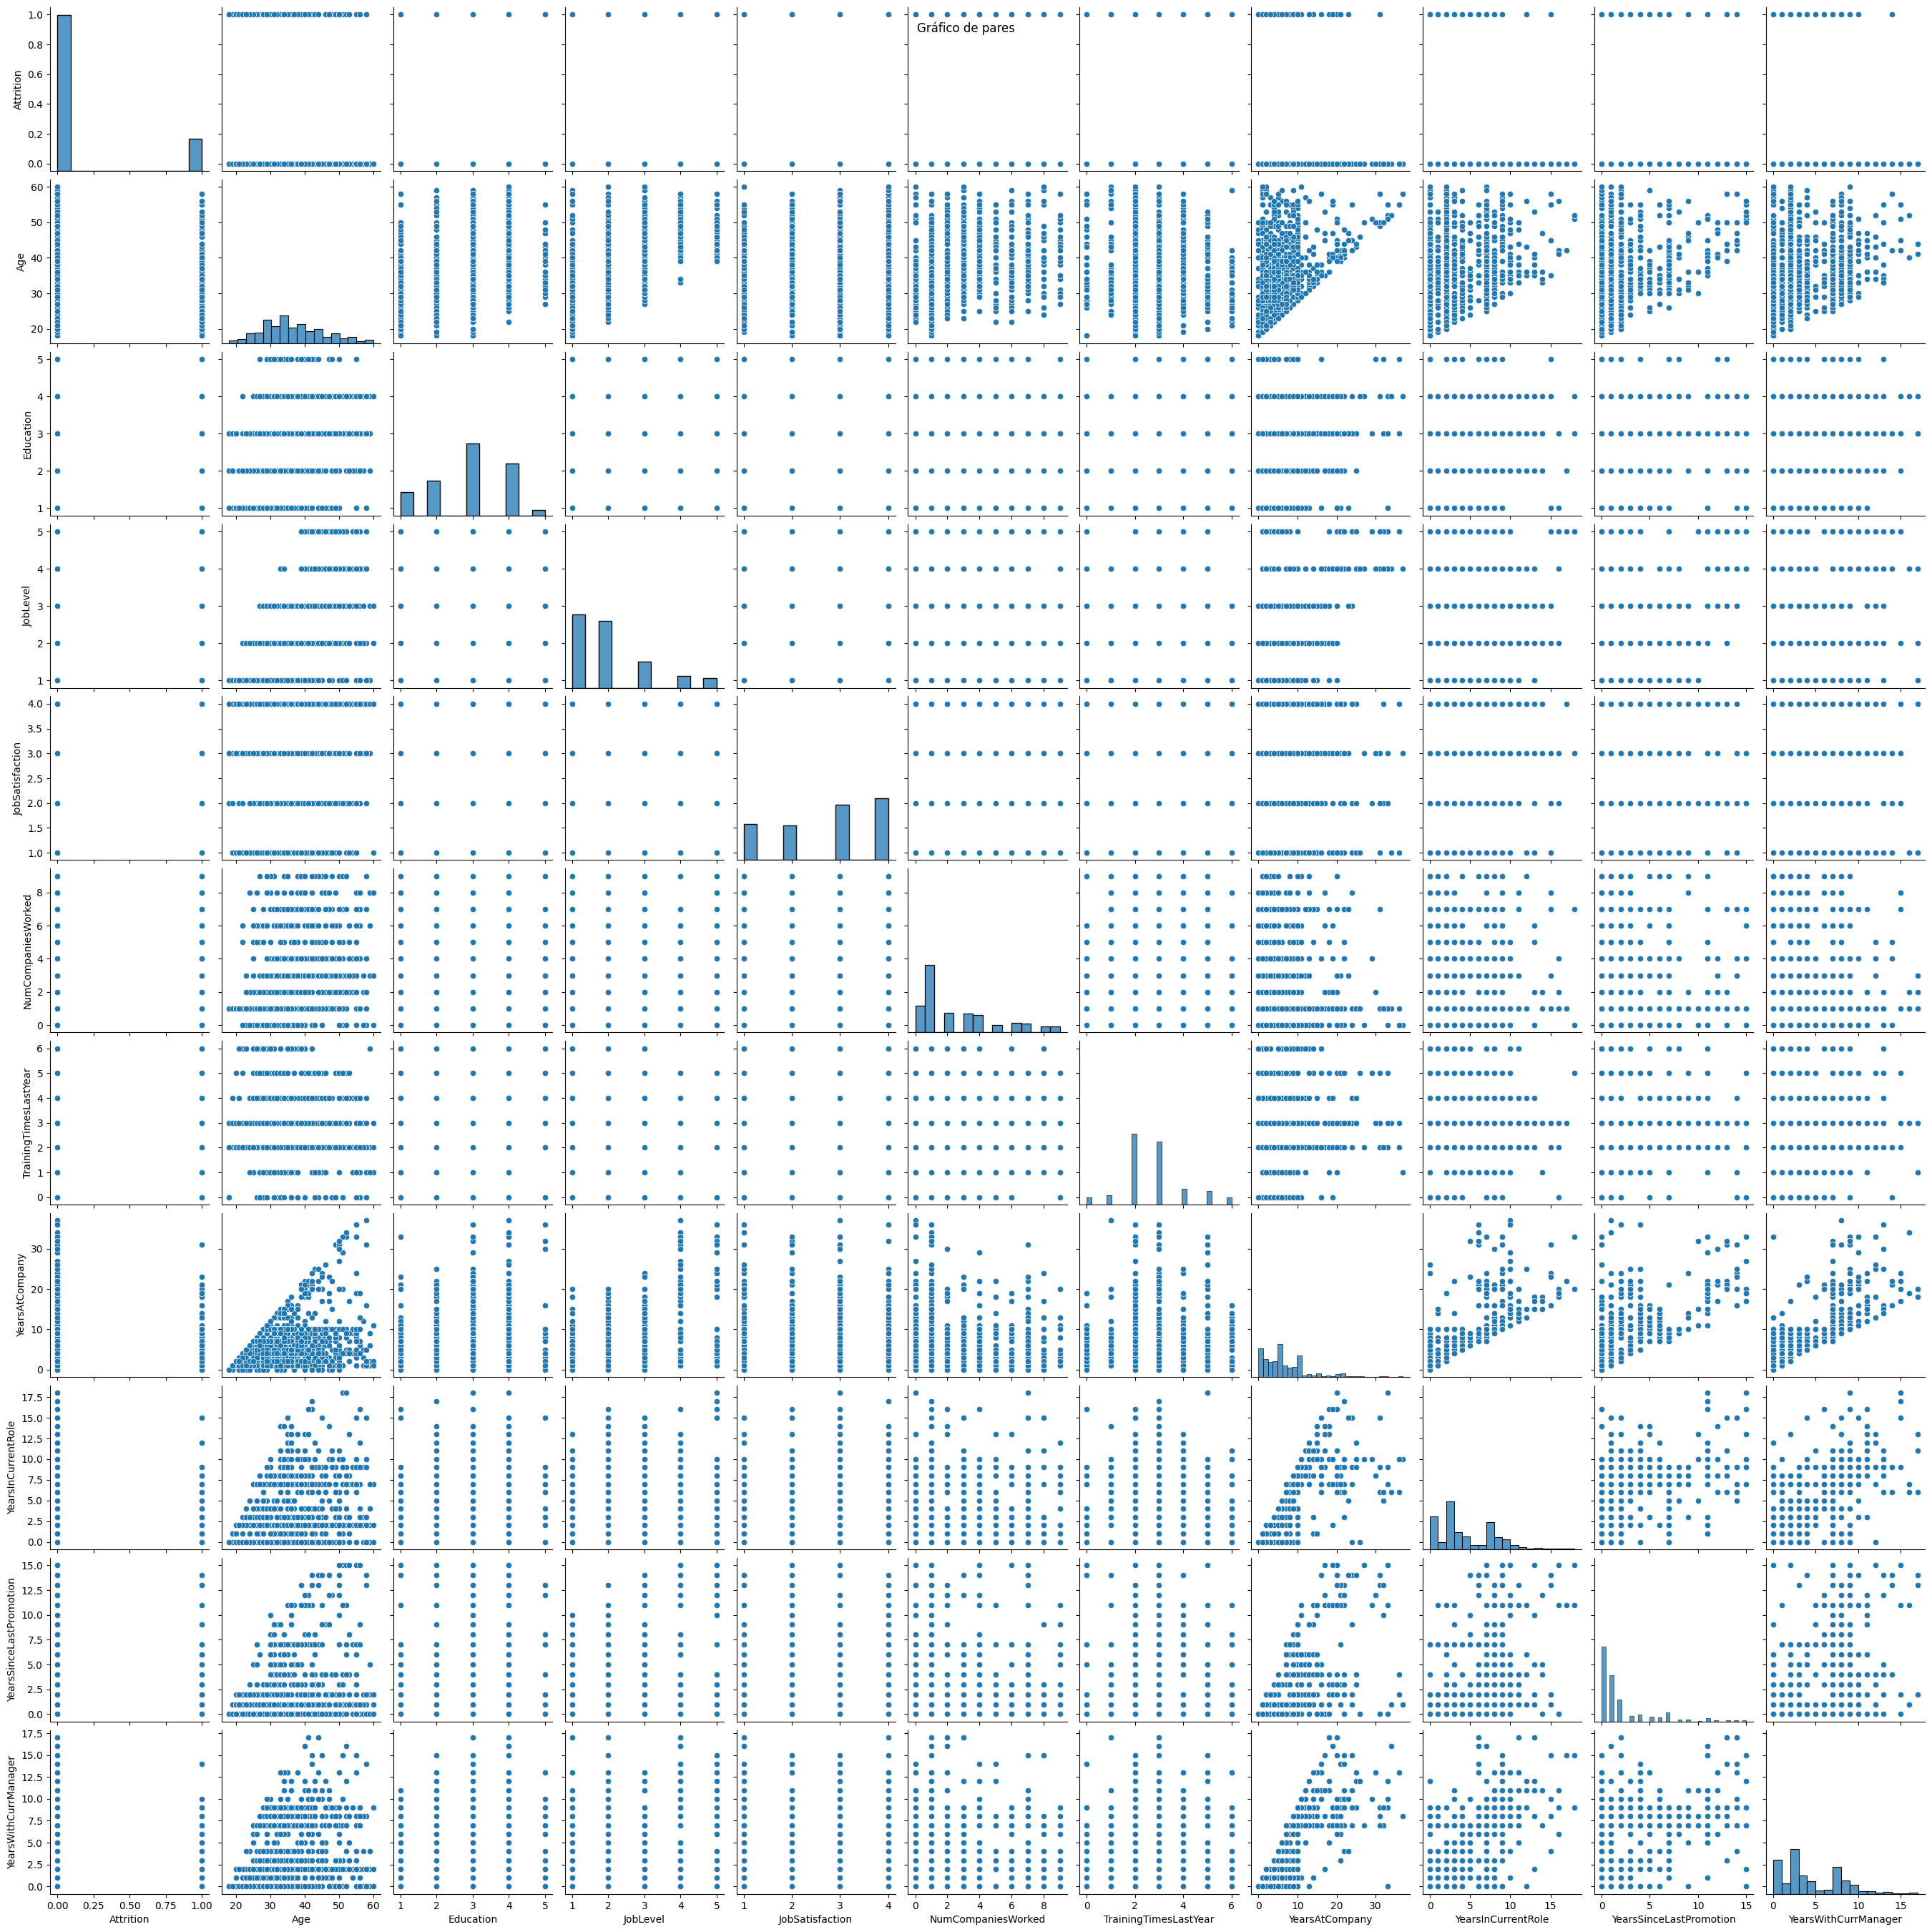

In [246]:
sns.pairplot(df)
plt.suptitle('Gráfico de pares')
plt.show()

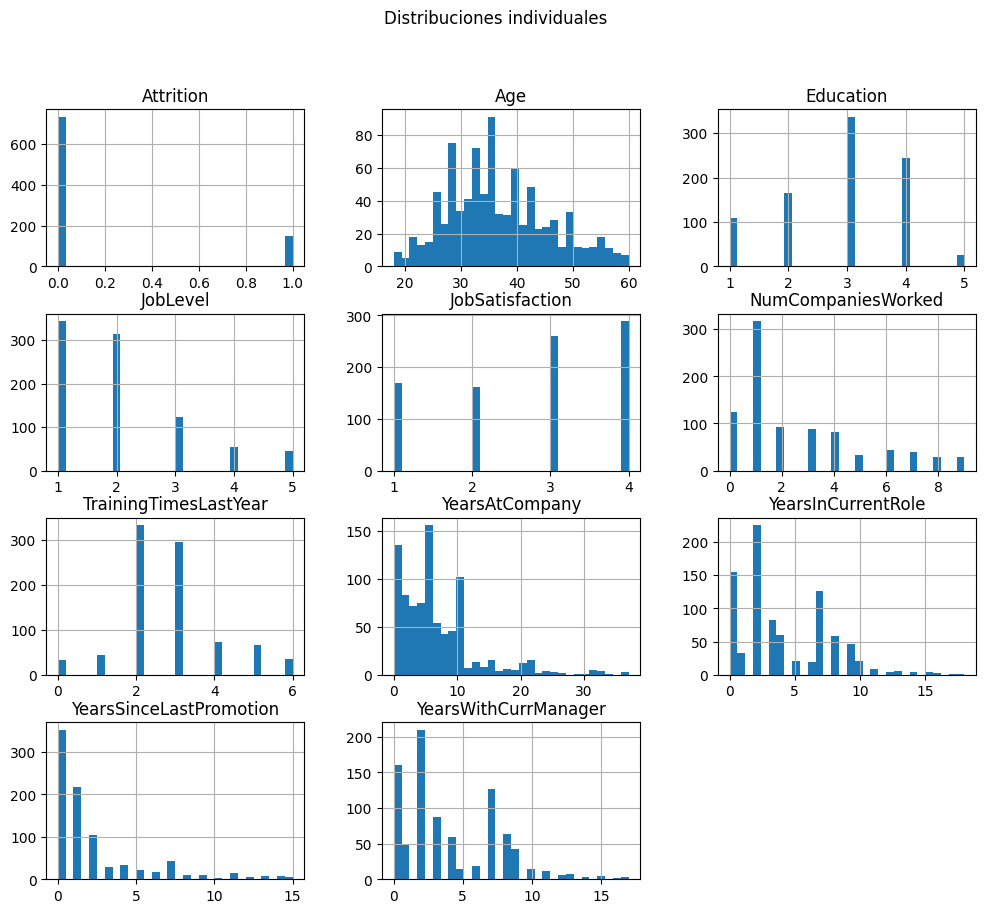

In [247]:
#Gráfica_03 Histograma múltiple
df.hist(bins = 30, figsize = (12,10))
plt.suptitle('Distribuciones individuales')
plt.show()

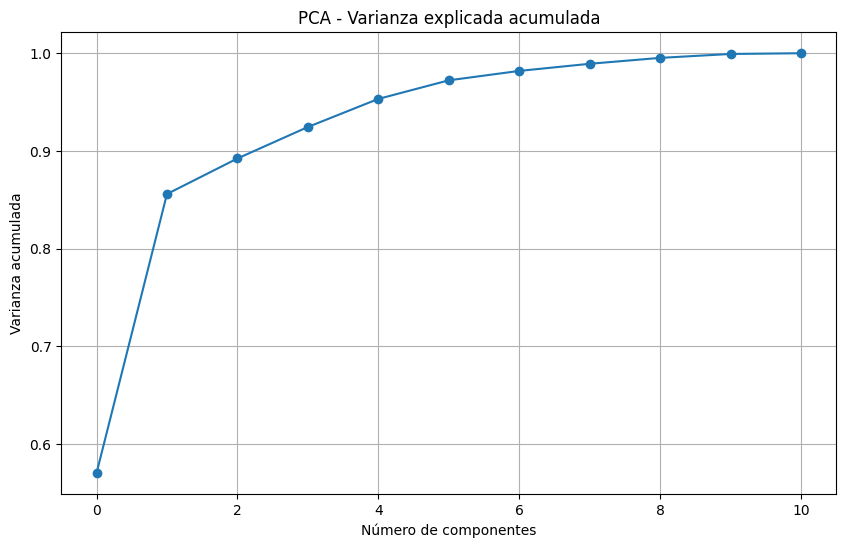

In [248]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
df.drop("Attrition", axis = 1)
# PCA para ver la varianza explicada
pca = PCA()
df_scaled = pca.fit_transform(df)

# Visualización de varianza acumulada
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada")
plt.title("PCA - Varianza explicada acumulada")
plt.grid()
plt.show()

In [249]:
# Mostrar varianza acumulada en texto
var_explicada = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(var_explicada):
    print(f"Componentes: {i+1} -> Varianza acumulada: {var:.4f}")


Componentes: 1 -> Varianza acumulada: 0.5703
Componentes: 2 -> Varianza acumulada: 0.8560
Componentes: 3 -> Varianza acumulada: 0.8923
Componentes: 4 -> Varianza acumulada: 0.9245
Componentes: 5 -> Varianza acumulada: 0.9533
Componentes: 6 -> Varianza acumulada: 0.9723
Componentes: 7 -> Varianza acumulada: 0.9819
Componentes: 8 -> Varianza acumulada: 0.9892
Componentes: 9 -> Varianza acumulada: 0.9952
Componentes: 10 -> Varianza acumulada: 0.9992
Componentes: 11 -> Varianza acumulada: 1.0000


In [250]:
#Estandarización
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)

In [251]:
#PCA

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)

#Calcular PCA gráfica de varianza

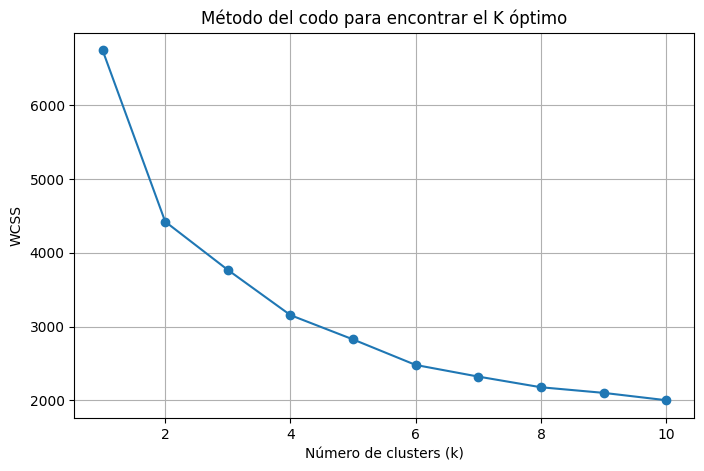

In [252]:
#Kmedias
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k,n_init = 'auto', random_state=42)
    kmeans.fit(df_pca)  
    wcss.append(kmeans.inertia_)  

# Gráfico del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('Método del codo para encontrar el K óptimo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

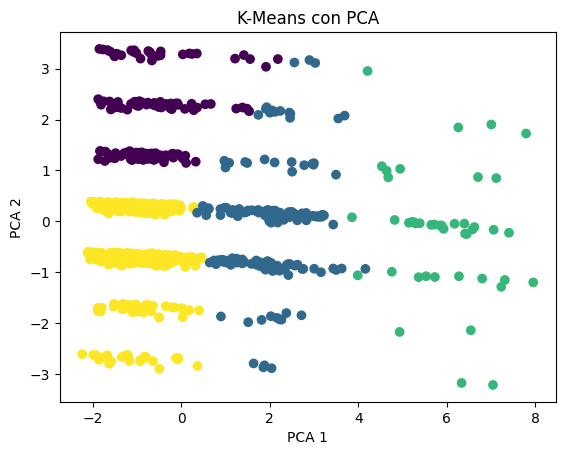

Silhouette Score K-Means: 0.28478798651310966


In [253]:
kmeans = KMeans(n_clusters=4,n_init = 'auto' , random_state=42)
labels_kmeans = kmeans.fit_predict(df_pca)

# Visualizar
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_kmeans, cmap='viridis')
plt.title("K-Means con PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Silhouette
sil_kmeans = silhouette_score(df_pca, labels_kmeans)
print("Silhouette Score K-Means:", sil_kmeans)

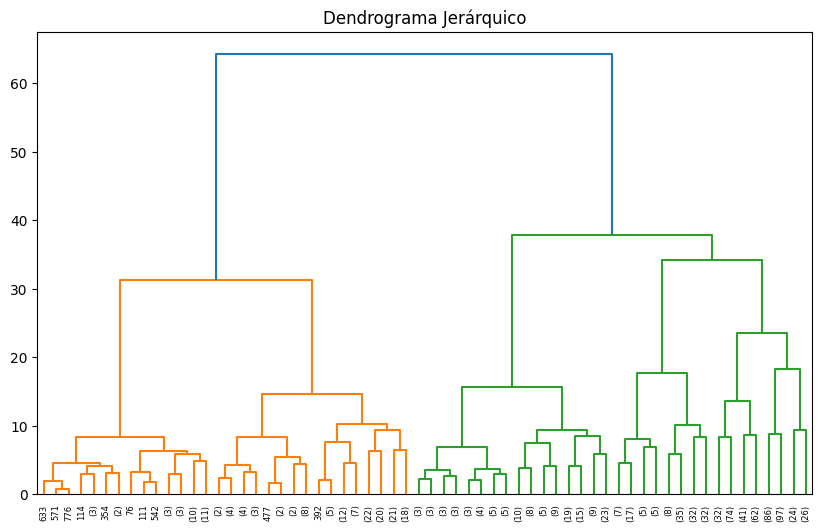

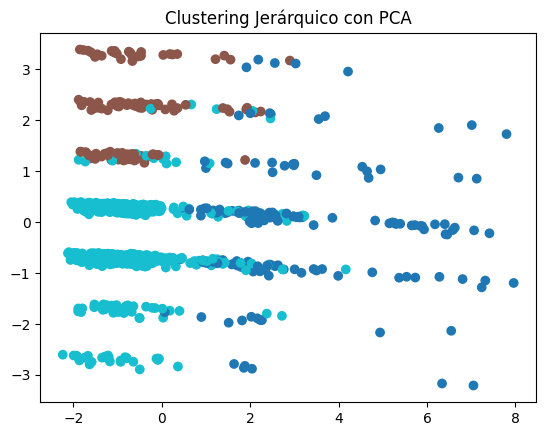

Silhouette Score Jerárquico: 0.25280593639359517


In [254]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage_matrix = linkage(df_pca, method='ward')

# Dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Dendrograma Jerárquico")
plt.show()

# Agrupar 
labels_hier = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Visualizar clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_hier, cmap='tab10')
plt.title("Clustering Jerárquico con PCA")
plt.show()

# Silhouette
sil_hier = silhouette_score(df_pca, labels_hier)
print("Silhouette Score Jerárquico:", sil_hier)

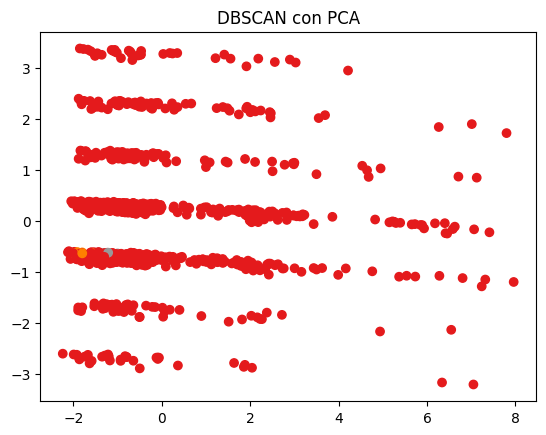

Silhouette Score DBSCAN: 0.5899647242213931


In [255]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.38, min_samples=5)
labels_dbscan = dbscan.fit_predict(df_pca)

# Visualizar
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_dbscan, cmap='Set1')
plt.title("DBSCAN con PCA")
plt.show()

# Silhouette 
valid = labels_dbscan != -1
if valid.sum() > 0:
    sil_dbscan = silhouette_score(df_pca[valid], labels_dbscan[valid])
    print("Silhouette Score DBSCAN:", sil_dbscan)
else:
    print("DBSCAN no detectó clusters válidos.")

In [318]:
print("Silhouette Score DBSCAN:", sil_dbscan)
print("Silhouette Score Jerárquico:", sil_hier)
print("Silhouette Score K-Means:", sil_kmeans)

Silhouette Score DBSCAN: 0.5899647242213931
Silhouette Score Jerárquico: 0.25280593639359517
Silhouette Score K-Means: 0.28478798651310966


In [319]:
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print("Número de clusters detectados", {n_clusters})

Número de clusters detectados {2}


In [320]:
df_pca_clust = np.concatenate([df_pca, labels_dbscan.reshape(-1,1)],axis = 1)

In [321]:
x = df_pca_clust
y = df['Attrition']

In [347]:
#Separacion de los datos para el entenamiento 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_pca_clust, y, test_size=0.3, random_state=42, stratify = y
)

In [348]:
print(df['Attrition'].value_counts())

Attrition
0    732
1    150
Name: count, dtype: int64


In [349]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
x_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [350]:
print(y_train_res.value_counts())

Attrition
0    512
1    512
Name: count, dtype: int64


In [351]:
from sklearn.ensemble import RandomForestClassifier
clasificacion = RandomForestClassifier(class_weight='balanced',n_estimators=100,random_state = 42)
clasificacion.fit(x_train_res,y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [352]:
y_pred = clasificacion.predict(X_test)

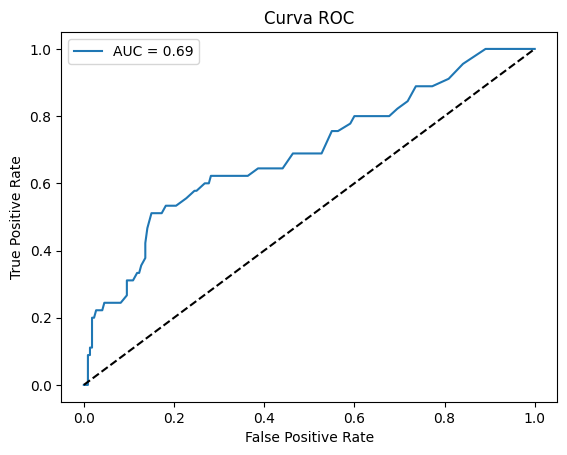

In [353]:
from sklearn.metrics import roc_curve, auc

y_prob = clasificacion.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()


In [354]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report

In [355]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average = 'binary')
recall = recall_score(y_test, y_pred,average = 'binary')
f1 = f1_score(y_test, y_pred,average = 'binary')
matriz = confusion_matrix(y_test, y_pred)

print("Resultados del modelo:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nMatriz de Confusión:")
print(matriz)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Resultados del modelo:
Accuracy: 0.7811
Precision: 0.3617
Recall: 0.3778
F1 Score: 0.3696

Matriz de Confusión:
[[190  30]
 [ 28  17]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       220
           1       0.36      0.38      0.37        45

    accuracy                           0.78       265
   macro avg       0.62      0.62      0.62       265
weighted avg       0.78      0.78      0.78       265



In [364]:
from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression(max_iter = 1000,random_state = 42, class_weight='balanced')
reg_log.fit(x_train_res,y_train_res)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

In [365]:
y_pred_log = reg_log.predict(X_test)

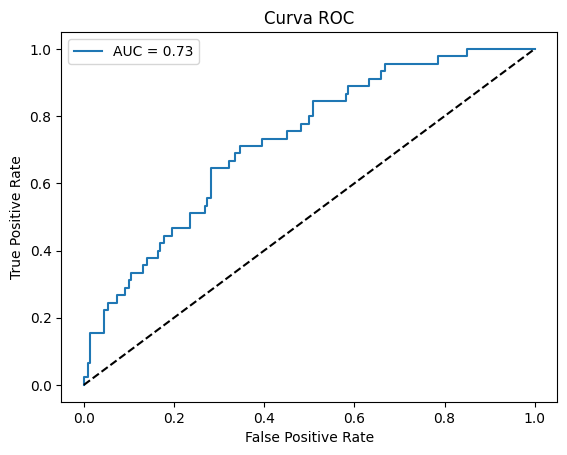

In [366]:
y_prob = reg_log.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()


In [359]:
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log,average = 'binary')
recall = recall_score(y_test, y_pred_log,average = 'binary')
f1 = f1_score(y_test, y_pred_log,average = 'binary')
matriz = confusion_matrix(y_test, y_pred_log)

print("Resultados del modelo:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nMatriz de Confusión:")
print(matriz)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_log))

Resultados del modelo:
Accuracy: 0.6755
Precision: 0.2970
Recall: 0.6667
F1 Score: 0.4110

Matriz de Confusión:
[[149  71]
 [ 15  30]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       220
           1       0.30      0.67      0.41        45

    accuracy                           0.68       265
   macro avg       0.60      0.67      0.59       265
weighted avg       0.80      0.68      0.71       265



In [360]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric = 'logloss', random_state = 42)
xgb.fit(x_train_res,y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [361]:
y_pred_xgb = xgb.predict(X_test)

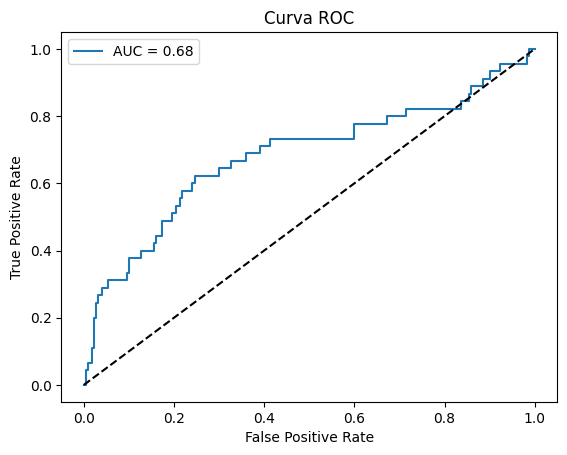

In [362]:
y_prob = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()


In [363]:
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
matriz = confusion_matrix(y_test, y_pred_xgb, )

print("Resultados del modelo:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nMatriz de Confusión:")
print(matriz)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb))

Resultados del modelo:
Accuracy: 0.7698
Precision: 0.3571
Recall: 0.4444
F1 Score: 0.3960

Matriz de Confusión:
[[184  36]
 [ 25  20]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       220
           1       0.36      0.44      0.40        45

    accuracy                           0.77       265
   macro avg       0.62      0.64      0.63       265
weighted avg       0.79      0.77      0.78       265

